In [12]:
# from methods import OA_SA, VA_SA
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils.plot_results import plot, plot_mean_rewards, plot_curves, moving_average
import pandas as pd

from copy import deepcopy

real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""


## Real scenario

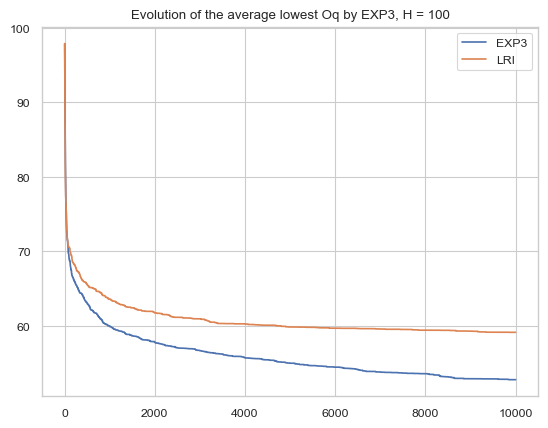

In [13]:
with open(f'results/static/{real}res_GameLearning_EXP3_K100_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K100_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by EXP3, H = 100")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [14]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


In [15]:

def render_results(data, labels=None, K = 50):
    rewards = []
    times = []
    oqs = []
    # omissions = []
    # metric = 'r'
    metric = 'oq'
    
    
    for k in data:
        ref = np.array([
                data[k][i][metric]
                for i in data[k].keys()
        ])
        print(np.mean(ref))
        break
    
    for k in data:
        if k == 'Offline':
            rs = data[k][metric]
            time = []
            oq = data[k]['oq']
        else:
            rs = np.array([
                data[k][i][metric]
                for i in data[k].keys()
            ])
            time = [data[k][i]['time'] for i in data[k].keys()]# if d[i]['time'] < 50]
            oq = [data[k][i]['oq'] for i in data[k].keys()]# if d[i]['time'] < 50]
        
        times.append(time)
        oqs.append(np.array(oq))
            
        rewards.append(rs)
        n = min(len(ref), len(rewards[-1]))
        rss = deepcopy(rewards)
        rewards[-1][:n] /= ref[:n]
        
        # omissions.append(
        #     [
        #         len(d[i]['solution']) - np.count_nonzero(d[i]['solution'])
        #         for i in data[k].keys()
        #     ]
        # )
    
    # print(len(oqs))
    # plt.boxplot(
    #     times,
    #     labels=labels,
    #     patch_artist=True,
    #     )

    # plt.violinplot(
    #     times,
    #     # labels=labels,
    #     )
    plt.title(f'Times for different methods (in seconds), d = {K}')
    # plt.savefig('times.png')
    plt.show()
    
    plt.boxplot(
        rewards[1:],
        labels=labels[1:],
        patch_artist=True,
        )

    # plt.violinplot(
    #     rewards,
    #     # labels=labels,
    #     )
    plt.title(f'Relative performance compared to DP, d = {K}')
    plt.hlines(1, 1, len(rewards)-1, linestyles='--', colors='red')
    plt.show()
    
    under = np.where(rewards[1] <1)[0]
    print(np.array(oqs[0])[under])
    print(np.array(oqs[1])[under])
    print(under)
    
    
    plt.boxplot(
        oqs,
        labels=labels,
        patch_artist=True,
        )
    plt.title(f'Oq, H = {K}')
    plt.show()
    # plt.boxplot(
    #     rss[:-1],
    #     labels=labels[:-1],
    #     patch_artist=True,
    #     )
    # plt.title(f'LP, H = {K}')
    
    # plt.legend()
    # # plt.savefig('times.png')
    # plt.show()
    
    # plt.boxplot(
    #     omissions,
    #     labels=labels,
    #     patch_artist=True,
    #     ) 

    # # plt.violinplot(
    # #     omissions,
    # #     # labels=labels,
    # #     )
    # plt.title(f'Number of packages omitted, K = {K}')
    # plt.legend()
    # plt.savefig('times.png')
    # plt.show()
    # return times, rewards
    

50.06
dict_keys(['res_DP', 'res_SA', 'res_greedy', 'SA TSP', 'EXP3', 'LRI', 'Offline'])
62.05


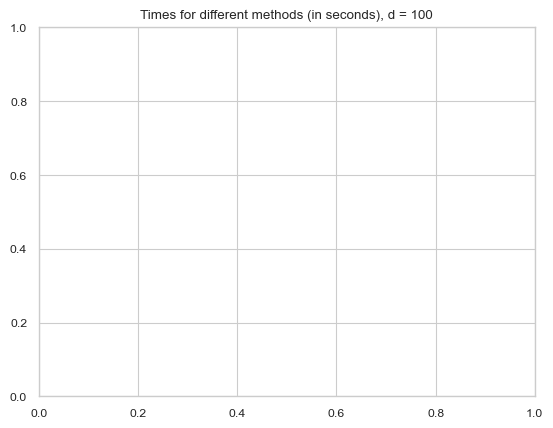

/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


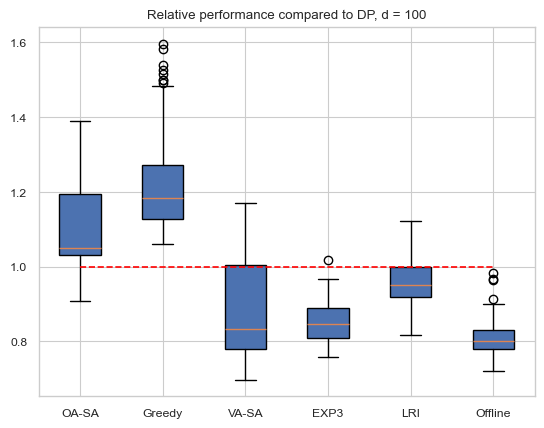

[62. 65. 63.]
[60. 59. 58.]
[ 1 31 44]


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


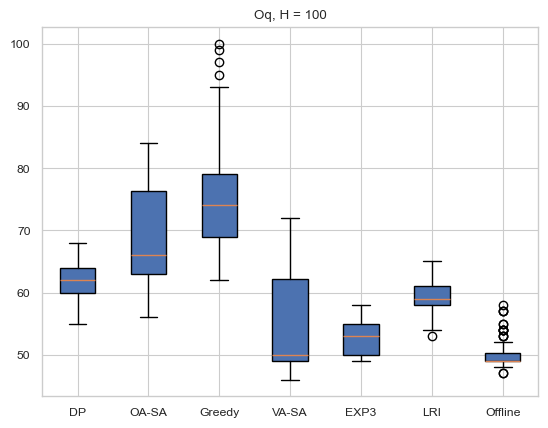

In [16]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100

with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
data100['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data100['EXP3'] = EXP_VA100
data100['LRI'] = lri_VA100

data100['Offline'] = dataOff100

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['DP', 'OA-SA', 'Greedy', 'VA-SA', 'EXP3', 'LRI', 'Offline'], K = H)
# render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)

## Uniform scenario

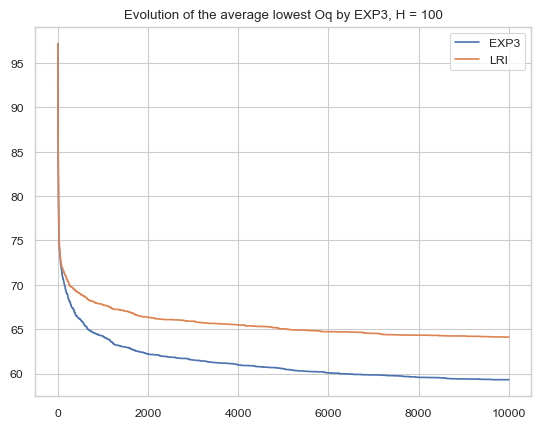

In [17]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
with open(f'results/static/{real}res_GameLearning_EXP3_K100_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K100_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by EXP3, H = 100")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [18]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


58.2
dict_keys(['res_DP', 'res_SA', 'res_greedy', 'SA TSP', 'EXP3', 'LRI', 'Offline'])
63.28


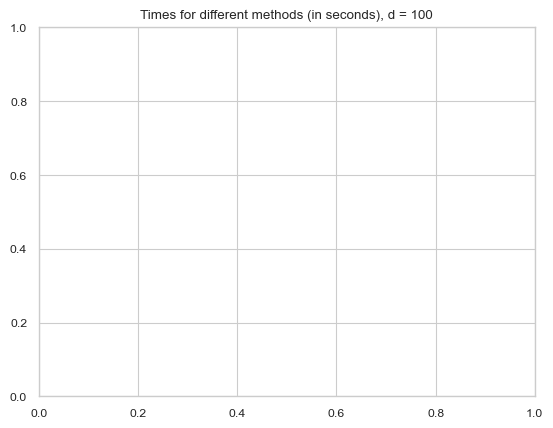

/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


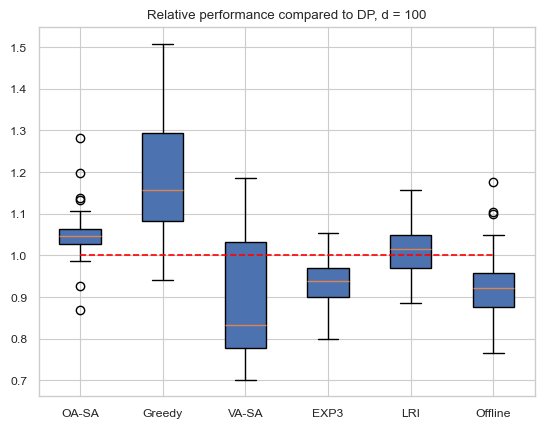

[70. 67. 68.]
[69. 62. 59.]
[ 7 11 56]


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


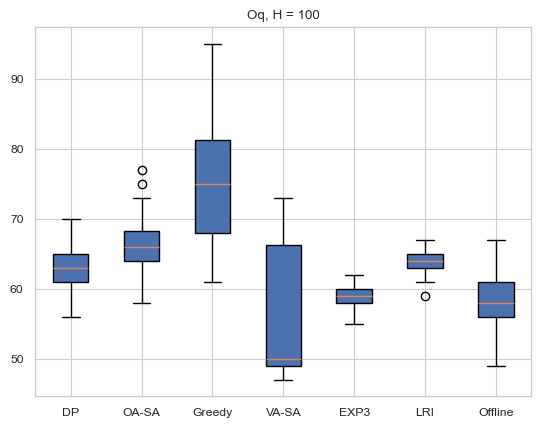

In [19]:


with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
data100['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data100['EXP3'] = EXP_VA100
data100['LRI'] = lri_VA100

data100['Offline'] = dataOff100

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['DP', 'OA-SA', 'Greedy', 'VA-SA', 'EXP3', 'LRI', 'Offline'], K = H)
# render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)

## Cluster

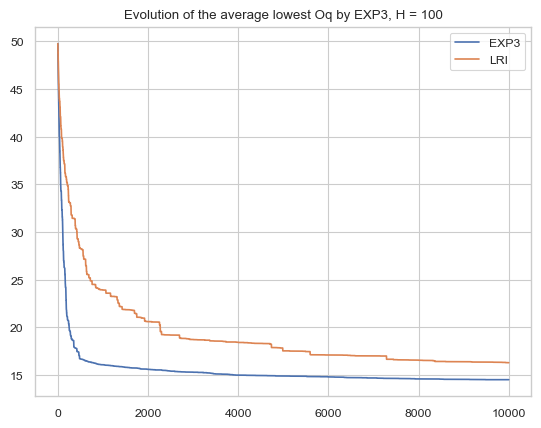

In [20]:
real_data = False
cluster_data = True
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 50
with open(f'results/static/{real}res_GameLearning_EXP3_K{H}_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K{H}_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by EXP3, H = 100")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [21]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


12.06
dict_keys(['res_DP', 'res_SA', 'res_greedy', 'SA TSP', 'EXP3', 'LRI', 'Offline'])
12.44


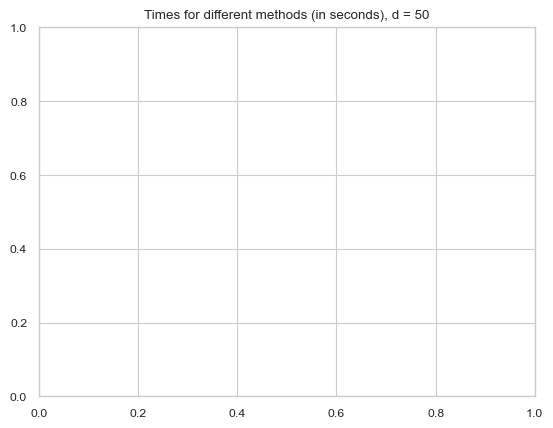

/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


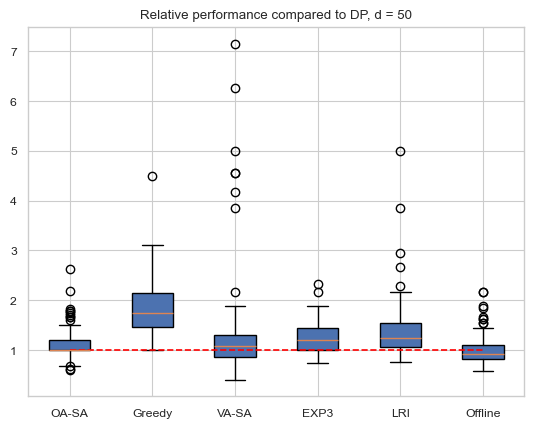

[16. 13. 10. 15. 16. 11.]
[10.  9.  9.  9. 11. 10.]
[16 27 44 64 68 86]


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_71972/2749674668.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


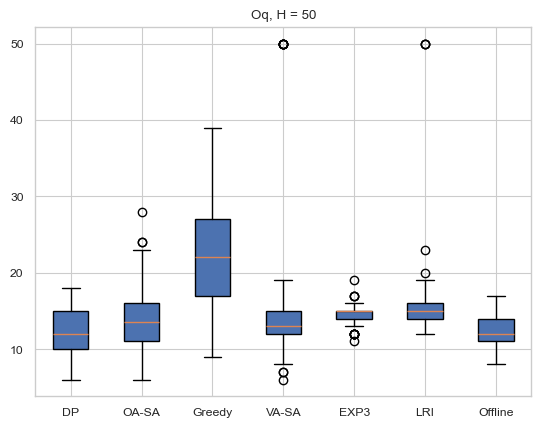

In [22]:


with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
data100['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data100['EXP3'] = EXP_VA100
data100['LRI'] = lri_VA100

data100['Offline'] = dataOff100

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['DP', 'OA-SA', 'Greedy', 'VA-SA', 'EXP3', 'LRI', 'Offline'], K = H)
# render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)